In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


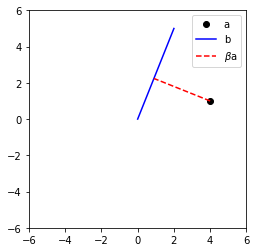

In [7]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (np.matrix.transpose(a)@b) / (np.matrix.transpose(a)@a)

# draw!
plt.plot(b[0],b[1],'ko',label='a')
plt.plot([0, a[0]],[0, a[1]],'b',label='b')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'$\beta$a')

plt.legend()
plt.axis((-6, 6, -6, 6))

plt.gca().set_aspect('equal', adjustable='box')
plt.show()


---
# VIDEO: Projections in R^N
---


In [8]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(np.matrix.transpose(A)@A) @ (np.matrix.transpose(A)@b)

# python solution
x2 = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)

# show that the results are the same
print([x1,x2])

[array([[-0.03961645],
       [ 0.08740449],
       [ 0.17523392],
       [ 0.29696569],
       [ 0.30097526],
       [ 0.32714886],
       [ 0.22098614],
       [-0.68377979],
       [-0.05191978],
       [ 0.12983323]]), array([[-0.03961645],
       [ 0.08740449],
       [ 0.17523392],
       [ 0.29696569],
       [ 0.30097526],
       [ 0.32714886],
       [ 0.22098614],
       [-0.68377979],
       [-0.05191978],
       [ 0.12983323]])]


[[-0.92225162]
 [ 0.67838782]
 [ 2.85395109]]
[[1.05823421]
 [0.24599533]
 [1.64332686]]


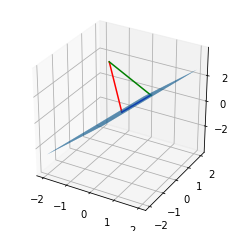

In [15]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)
Ax = A@x

print(b)
print(Ax)

## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()

# Decompose vectors to orthogonal components

[0. 0.]
0.0


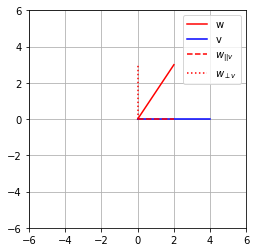

In [101]:
# vector w 
w = np.array([2, 3]).transpose()

# vector v
v = np.array([4, 0]).transpose()
v
# compute w-parallel to v
beta = np.matmul(np.transpose(w), v)/np.matmul(np.transpose(v),v)

w_par_v = beta*v

print((w_par_v + w_perp_v) - w)

print(np.matmul(w_par_v,w_perp_v))

plt.plot()
plt.plot([0, w[0]],[0, w[1]],'r')
plt.plot([0, v[0]],[0, v[1]],'b')
plt.plot([0, w_par_v[0]],[0, w_par_v[1]],'r--')
plt.plot([0, w_perp_v[0]],[0, w_perp_v[1]],'r:')
plt.legend(['w','v','$w_{||v}$', '$w_{\perp v}$'])
axisBase = np.array([-1, 1])
plt.xlim(axisBase*6), 
plt.ylim(axisBase*6)
plt.grid('both')

plt.gca().set_aspect('equal', adjustable='box')

In [105]:
x = np.array([1, 1, 0])


---
# VIDEO: QR decomposition
---


In [16]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
  
# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q)

# "economy" QR decompmosition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


R from QR: 
[[-3.16227766  0.63245553 -0.31622777]
 [ 0.         -1.26491106  2.21359436]]
R from Q^TA: 
[[-3.16227766e+00  6.32455532e-01 -3.16227766e-01]
 [ 4.44089210e-16 -1.26491106e+00  2.21359436e+00]]


[]

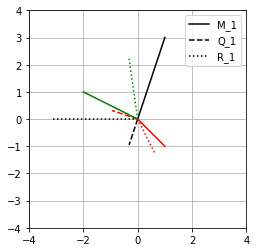

In [74]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(R)
print('R from Q^TA: '),print(Q.T@M)

# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M_1','Q_1','R_1'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()


# Implement the GS algorithm in code

In [141]:
# generate a mxn random matrix

# compute QR decomposition with matrix G

m = 3
n = 5
A = np.random.randn(m,n)
G = A.copy()

for i in range(n):
    # orthogonalize 
    for j in range(i):
        G[:,i] = G[:,i] - np.matmul(np.transpose(G[:,i]), G[:,j]) * G[:,j]
        
    # normalize
    G[:,i] = G[:,i]/ np.linalg.norm(G[:,i])
Q, R = np.linalg.qr(A, 'complete')

In [142]:
G

array([[ 0.842567  ,  0.27221072,  0.46473881, -0.62469505,  0.75412669],
       [ 0.27090349,  0.53158831, -0.80251179, -0.62469505, -0.32696402],
       [-0.46550203,  0.80206932,  0.37415593, -0.46852129, -0.56955023]])

In [143]:
Q

array([[-0.842567  , -0.27221072,  0.46473881],
       [-0.27090349, -0.53158831, -0.80251179],
       [ 0.46550203, -0.80206932,  0.37415593]])

# Inverse of QR matrix

AxesImage(54,36;334.8x217.44)
[[1. 1.]
 [1. 1.]]


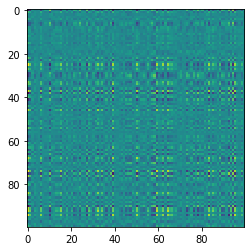

In [175]:
# generate a large (m =100) matrix and invert using QR and inv

m = 100
O = np.random.randn(m,m)
Oi = np.linalg.inv(O)

Q,R = np.linalg.qr(O)

OiQR = np.matmul(np.linalg.inv(R), np.transpose(Q))

print(plt.imshow(OiQR))

print(np.corrcoef(np.array([np.matrix.flatten(Oi), 
                            np.matrix.flatten(OiQR)])))

# Prove and demonstrate Sherman-Morrison inverse

In [258]:
# Prove this claim

'''
A = I -ab^T
A^-1 = I + (ab^T / 1 - a^Tb)

since A^T * A = I
then 
-ab^T * (ab^T / 1 - a^Tb)

So...
AA^-1 = (I - ab^T)(I + (ab^T)/(1-a^Tb))

= I + (ab^T)/(1 - a^Tb) - ab^T - (ab^T)^2/(1-a^Tb)

= I - ab^T + (ab^T -ab^Tab^T)/(1-a^Tb)

= I - ab^T + (ab^T - a(b^Ta)b^T)/(1-a^Tb)

= I - ab^T + (ab^T - ab^T(b^Ta))/(1-a^Tb)

= I - ab^T + (ab^T(1-b^Ta))/(1 - a^Tb)

= I - ab^T + ab^T

= I
'''

# Find the failure condition

'''
if a^Tb = 1 then denominator will equal 0
'''
# Implement an example in code
m = 5
a = np.random.randn(m, 1)
b = np.random.randn(m, 1)

#(np.matrix.transpose(a)@b) / (np.matrix.transpose(a)@a)

A = np.eye(m) - a @ b.T

Ai = np.eye(m) + (a @ b.T)/(1 -a.T @ b)

A @ Ai

array([[ 1.00000000e+00,  3.79470760e-19,  1.47451495e-17,
         4.33680869e-19, -3.46944695e-18],
       [ 1.04083409e-17,  1.00000000e+00, -2.08166817e-17,
        -3.64291930e-17,  0.00000000e+00],
       [ 6.93889390e-18,  5.63785130e-18,  1.00000000e+00,
         1.21430643e-17,  0.00000000e+00],
       [ 2.77555756e-17, -5.42101086e-19,  1.56125113e-17,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.04083409e-17, -5.55111512e-17,
        -1.38777878e-17,  1.00000000e+00]])

# A^TA = R^TR


In [265]:
# generate random matrix A
m = 5
n = 7
A = np.random.randn(m, n)

# Compute the QR Decomp
Q, R = np.linalg.qr(A, 'complete')
AtA = A.T @ A
RtR = R.T @ R
# Test
print(AtA - RtR)
# Prove

'''
Since
Q^TQ = I

if A = QR
then (A)^T A = R^T Q^TQ R
is the same as R^T R
'''

[[-2.66453526e-15 -4.44089210e-16  8.88178420e-16 -1.11022302e-15
   0.00000000e+00  4.44089210e-16 -4.44089210e-16]
 [-4.44089210e-16  4.44089210e-16  0.00000000e+00 -1.77635684e-15
  -4.44089210e-16  4.44089210e-16  0.00000000e+00]
 [ 8.88178420e-16  0.00000000e+00  3.55271368e-15  5.77315973e-15
   2.22044605e-15 -2.22044605e-15  0.00000000e+00]
 [-1.11022302e-15 -1.77635684e-15  5.77315973e-15  4.44089210e-15
   1.33226763e-15 -2.44249065e-15 -6.66133815e-16]
 [ 0.00000000e+00 -4.44089210e-16  2.22044605e-15  1.33226763e-15
   0.00000000e+00 -1.33226763e-15 -3.33066907e-16]
 [ 4.44089210e-16  4.44089210e-16 -2.22044605e-15 -2.44249065e-15
  -1.33226763e-15  1.77635684e-15  7.77156117e-16]
 [-4.44089210e-16  0.00000000e+00  0.00000000e+00 -6.66133815e-16
  -3.33066907e-16  7.77156117e-16  1.77635684e-15]]


'\n\n\n'

In [267]:
A1 = np.random.randn(m,n)

In [268]:
A1.T @ A

array([[-0.52056305, -0.85036132,  2.38240228,  3.09763125,  1.15771375,
         0.89530702,  1.11415117],
       [ 3.14547782,  3.09505765, -4.82635305, -1.04450426, -0.17401185,
         1.11506515,  4.42362168],
       [-2.76778285, -3.07512167,  3.91184786, -1.31614405, -0.99989392,
         0.50642974, -3.43462637],
       [-0.37932217, -1.00569235,  2.81554199,  0.74640762, -0.81332959,
         1.49691214,  1.57736442],
       [ 0.39063747, -1.25908972,  2.74701162,  1.34333755, -1.1806635 ,
         3.14698511,  2.19037186],
       [ 1.65085741,  1.17246824, -3.35836408, -1.36915802, -0.5771912 ,
         0.03834532, -0.6688621 ],
       [ 0.7048829 , -2.00573965, -1.27835205, -1.77873189, -1.61994424,
         4.09953987, -2.98617526]])